<a href="https://colab.research.google.com/github/VitorMazziero/Processos-Fermentativos/blob/main/Modelos%20Cineticos%20para%20Simula%C3%A7%C3%A3o%20-%20Batelada%20Alimentada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Batelada Alimentada (Semicontínuo)


Diferentemente da Batelada Simples, no semicontínuo há a variação de volume, caracterizada apenas pela **adição de substrato** **sem saída** de meio reacional

A taxa de alimentação de meio no reator pode ser realizada de diferentes formas, sendo as principais apresentadas a seguir:

> Vazão constante

> Vazão linear

> Vazão exponencial





##Taxa de alimentação de meio ($Q$)

A taxa de alimentação, vazão de entrada, é definida como variação do volume pelo tempo: $ Q = \frac{\mathrm{d} V}{\mathrm{d} t}$

Para vazão constante: $\frac{\mathrm{d} V}{\mathrm{d} t} = \beta$

Integrando: $V = V_{0} + \beta t$

Para variação linear da vazão: $\frac{\mathrm{d} V}{\mathrm{d} t} =Q_{0} + \beta t$

Integrando: $V = V_{0}+Q_{0}t + \frac{\beta t^2}{2}$

Para variação exponencial da vazão: $\frac{\mathrm{d} V}{\mathrm{d} t} =Q_{0}e^{\beta t}$

Integrando: $V = V_{0}+ \frac{Q_{0}}{\beta}(e^{\beta t}-1)$


In [8]:
from numpy import arange
import matplotlib.pyplot as plt
import numpy as np
import math as m

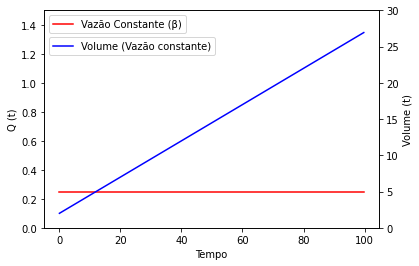

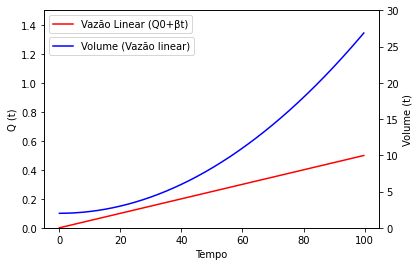

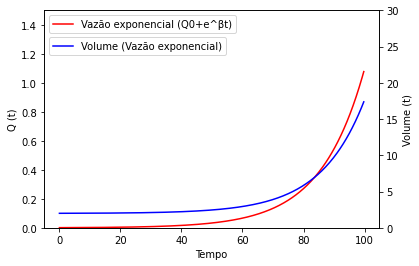

In [7]:
t= np.arange(0,100,0.25)

# Vazão constante
V0 = 2.0
Q=0.25

Q_1 = [Q] * len(t)
V_1 = V0+Q_1*t

#Plotar resultados
fig, ax1 = plt.subplots()
ax1.plot(t,Q_1,label='Vazão Constante (β)', color ='r')
ax1.set_ylabel('Q (t)')
ax1.set_ylim([0, 1.5])
ax2 = ax1.twinx()
ax2.plot(t,V_1,label='Volume (Vazão constante)', color ='b')
ax2.set_ylabel('Volume (t)')
ax2.set_ylim([0, 30])
ax1.set_xlabel('Tempo')
ax1.legend(['Vazão Constante (β)'], loc='upper left', bbox_to_anchor=(0, 1))
ax2.legend(['Volume (Vazão constante)'], loc='upper left', bbox_to_anchor=(0, 0.9))
plt.show()

#Vazão linear
Q0 = 0
V0 = 2.0
β = 0.005
Q_2 = Q0 + β*t
V_2 = V0 + Q0*t + (β*t**2)/2

#Plotar resultados
fig, ax1 = plt.subplots()
ax1.plot(t,Q_2,label='Vazão Linear (Q0+βt)', color ='r')
ax1.set_ylabel('Q (t)')
ax1.set_ylim([0, 1.5])
ax2 = ax1.twinx()
ax2.plot(t,V_2,label='Volume (Vazão linear)', color ='b')
ax2.set_ylabel('Volume (t)')
ax2.set_ylim([0, 30])
ax1.set_xlabel('Tempo')
ax1.legend(['Vazão Linear (Q0+βt)'], loc='upper left', bbox_to_anchor=(0, 1))
ax2.legend(['Volume (Vazão linear)'], loc='upper left', bbox_to_anchor=(0, 0.9))
plt.show()

#Vazão exponencial
Q0 = 0.001
V0 = 2.0
β = 0.07
Q_3 = Q0*((2.71828)**(β*t))
V_3 = V0 + (Q0/β)*(2.71828**(β*t)-1)

#Plotar resultados
fig, ax1 = plt.subplots()
ax1.plot(t,Q_3,label='Vazão exponencial (Q0+e^βt)', color ='r')
ax1.set_ylabel('Q (t)')
ax1.set_ylim([0, 1.5])
ax2 = ax1.twinx()
ax2.plot(t,V_3,label='Volume (Vazão exponencial)', color ='b')
ax2.set_ylabel('Volume (t)')
ax2.set_ylim([0, 30])
ax1.set_xlabel('Tempo')
ax1.legend(['Vazão exponencial (Q0+e^βt)'], loc='upper left', bbox_to_anchor=(0, 1))
ax2.legend(['Volume (Vazão exponencial)'], loc='upper left', bbox_to_anchor=(0, 0.9))
plt.show()

##Balanço de Massa Celular

Acúmulo = Entra - Sai + Geração - Consumo

⠀

Para Batelada Alimentada o balanço geral é simplificado para: 


> Acúmulo $=$ Entra + Geração - Morte

⠀⠀⠀⠀⠀⠀⠀⠀⠀$\therefore$

> ⠀⠀⠀$\frac{\mathrm{dm_{x}} }{\mathrm{d} t} = Qm_{xe} + R_{x} - R_{d}$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀ Eq. (1)

---
Na qual: **Taxa de alimentação** = $Q$ ; **Variação da massa celular = $\frac{\mathrm{dC_{x}} }{\mathrm{d} t}$** ; **Geração mássica celular = $R_{x}$** ; **Taxa mássica de morte Celular** = $R_{d}$ e **Massa de células na vazão de entrada** = $m_{xe}$

---

Substituindo massa $m_{x}$ pela concentração celular $C_{x}$ utilizando a relação $C_{x}=\frac{m_{x}}{V}$, a geração celular passa a ser descrita por $r_{x}=\frac{R_{x}}{V}$ e a morte celular por $r_{d}=\frac{R_{d}}{V}$:

$\frac{\mathrm{dC_{x} V} }{\mathrm{d} t} = QC_{xe} + r_{x}V - r_{d}V$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (2)


Como na batelada alimentada o volume não é mais constante aplica-se a regra do produto no primeiro termo da Eq. (2):

$\frac{\mathrm{dC_{x}V} }{\mathrm{d} t}\Rightarrow C_{x}\frac{\mathrm{dV} }{\mathrm{d} t} + V\frac{\mathrm{dC_{x}} }{\mathrm{d} t}$


Substituindo $\frac{\mathrm{dV} }{\mathrm{d} t}$ por $Q$, chega-se na Eq. (3) que descreve o acúmulo celular:


$C_{x}\frac{\mathrm{dV} }{\mathrm{d} t} + V\frac{\mathrm{dC_{x}} }{\mathrm{d} t} = C_{x}Q + V\frac{\mathrm{dC_{x}} }{\mathrm{d} t}$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (3)




Analogamente a Batelada Simples, as taxas de crescimento e morte celular são descritas a seguir uitlizando a relação para reações de primeira ordem:

$r_{x}=\frac{\mathrm{d}[C] }{\mathrm{d} t} = k_{1}[C]^{1}$ 

$r_{d}=-\frac{\mathrm{d}[C] }{\mathrm{d} t} = k_{2}[C]^{1}$ 

---

Na qual: $[C]^{1} = C_{x}$ ; $k_{1}=\mu$ (taxa de crescimento celular) e $k_{2}=k_{d}$ (taxa de morte celular)

---

Assim, chega-se na Eq. (4) que descreve a geração e morte de células:

$r_{x}V - r_{d}V = (\mu - k_{d})  C_{x} V$  ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (4)

Portanto, unindo-se as Eq. (3) e (4), a partir da Eq.(2), obtém-se a Eq. (5):



$C_{x}Q + V\frac{\mathrm{dC_{x}} }{\mathrm{d} t} = QC_{xe} + (\mu - k_{d})  C_{x} V$






Dividindo a equação anterior por $V$ e colocando $C_{x}$ em evidência:



$\frac{\mathrm{dC_{x}} }{\mathrm{d} t} =\frac{Q}{V}C_{xe} + (\mu - k_{d} -\frac{Q}{V})  C_{x} $



---

Definindo a **taxa de diluição** como $D = \frac{Q}{V}$


---



> $\frac{\mathrm{dC_{x}} }{\mathrm{d} t} =DC_{xe} + (\mu - k_{d} -D)  C_{x} $   ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (5)

Assim, é definida a função para integração numérica ***Cx_Var*** que descreve a variação de Cx com o tempo

In [ ]:
def Cx_Var(Cx, t, μ, kd, Cxe, D):
    dCxdt = D*Cxe+(μ-Kd-D)*Cx #Eq. (5)
    return dCxdt

##Balanço de Massa de Substrato

Acúmulo = Entra - Sai + Geração - Consumo

⠀

Para Batelada Simples o balanço geral de substrato é simplificado para: 


> Acúmulo $=$ Entra$-$Consumo

⠀⠀⠀⠀⠀⠀⠀⠀⠀$\therefore$

> $\frac{\mathrm{dm_{s}} }{\mathrm{d} t} = Qm_{se}-R_{s} = QC_{se}-r_{s}V$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀ Eq. (6)

---
Na qual: **Variação mássica de substrato = $\frac{\mathrm{dm_{s}} }{\mathrm{d} t}$** e **Consumo de substrato = $R_{s}$** **Massa de células na vazão de entrada** = $m_{se}$

---

Análogo ao acúmulo de massa celular, o acúmulo de substrato no reator é dado pela regra do produto no primeiro termo da Eq.(6)

$\frac{\mathrm{dm_{s}} }{\mathrm{d} t} = \frac{\mathrm{dC_{s}V} }{\mathrm{d} t}\Rightarrow C_{s}\frac{\mathrm{dV} }{\mathrm{d} t} + V\frac{\mathrm{dC_{s}} }{\mathrm{d} t}$

Assim:

$\frac{\mathrm{dC_{s}V} }{\mathrm{d} t} = C_{s}\frac{\mathrm{dV} }{\mathrm{d} t} + V\frac{\mathrm{dC_{s}} }{\mathrm{d} t}= QC_{se}-r_{s}V$ ⠀⠀⠀⠀⠀⠀⠀ ⠀⠀ Eq. (7)



Para relacionar o consumo de substrato com a formação celular, é necessário definir o **rendimento de crescimento celular** $Y_{\frac{x}{s}}$ (a quantidade de célula que é formada por substrato consumido): 


$Y_{\frac{x}{s}} = \frac{r_{x}}{r_{s}}$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (8)

Substituindo a Eq.(8) na Eq.(7):

$C_{s}\frac{\mathrm{dV} }{\mathrm{d} t} + V\frac{\mathrm{dC_{s}} }{\mathrm{d} t}= QC_{se}-\frac{r_{x}}{Y_{\frac{x}{s}}}V$

$C_{s}\frac{\mathrm{dV} }{\mathrm{d} t} + V\frac{\mathrm{dC_{s}} }{\mathrm{d} t}= QC_{se}-\frac{\mu C_{x}}{Y_{\frac{x}{s}}}V$⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (9)



Isolando $\frac{\mathrm{dC_{s}} }{\mathrm{d} t}$ e substiutindo $D = \frac{Q}{V}$, chega-se a Eq.(10):


> $\frac{\mathrm{dC_{s}} }{\mathrm{d} t}= D(C_{se}-C_{s}) - \frac{\mu C_{x}}{Y_{\frac{x}{s}}}$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (10)



Assim, é definida a função para integração numérica ***Cs_Var*** que descreve a variação de Cs com o tempo

In [ ]:
def Cs_Var(Cs, t, Cse, D, μ, Cx, Yxs):
    dCsdt = D*(Cse-Cs)-μ*Cx/Yxs #Eq. (10)
    return dCsdt

##Balanço de Massa de Produto 

Acúmulo = Entra - Sai + Geração - Consumo

⠀

Para Batelada Simples o balanço geral de produto é simplificado para: 


> Acúmulo $=$ Entra + Gerado - Degradado

⠀⠀⠀⠀⠀⠀⠀⠀⠀$\therefore$

> $\frac{\mathrm{dm_{p}} }{\mathrm{d} t} = Qm_{pe} + R_{p} - R_{dp} = QC_{pe} r_{p}V - r_{dp}V$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀ Eq. (11)

---
Na qual: **Variação mássica de produto = $\frac{\mathrm{dm_{p}} }{\mathrm{d} t}$** ; **Geração de produto = $R_{p}$** ; **Massa de produto na vazão de entrada** = $m_{pe}$ e **Degradação de produto = $R_{dp}$**

---

Análogo ao acúmulo de massa celular, o acúmulo de substrato no reator é dado pela regra do produto no primeiro termo da Eq.(11)

$\frac{\mathrm{dm_{p}} }{\mathrm{d} t} = \frac{\mathrm{dC_{p}V} }{\mathrm{d} t}\Rightarrow C_{p}\frac{\mathrm{dV} }{\mathrm{d} t} + V\frac{\mathrm{dC_{p}} }{\mathrm{d} t}$

Assim:

$\frac{\mathrm{dC_{p}V} }{\mathrm{d} t} = C_{p}\frac{\mathrm{dV} }{\mathrm{d} t} + V\frac{\mathrm{dC_{p}} }{\mathrm{d} t}= QC_{pe} + r_{p}V - r_{dp}V$ ⠀⠀⠀⠀⠀⠀⠀ ⠀⠀ Eq. (12)



Isolando $\frac{\mathrm{dC_{p}} }{\mathrm{d} t}$ e substiutindo $D = \frac{Q}{V}$, chega-se a Eq.(13):

> $\frac{\mathrm{dC_{p}} }{\mathrm{d} t} = D (C_{pe}- C_{p}) + r_{p} - r_{dp} $  ⠀⠀⠀⠀⠀⠀⠀ ⠀⠀ Eq. (13)



Para relacionar a geração de produto com a formação celular, é necessário definir seu tipo de geração, que afetará o valor da taxa de formação do produto ($r_{p})$, na qual $\alpha$ e $\beta$ são constantes e $r_{dp} = k_{dp}C_{p}$:
⠀

⠀

>**Associado ao crescimento:** ⠀$\frac{\mathrm{dC_{p}} }{\mathrm{d} t} = D (C_{pe}- C_{p}) + \alpha \mu C_{x} - k_{dp}C_{p}$  ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (14)

⠀

>**Não associado ao crescimento:** ⠀$\frac{\mathrm{dC_{p}} }{\mathrm{d} t} = D (C_{pe}- C_{p}) + \beta C_{x} - k_{dp}C_{p}$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (15)

⠀

>**Parcialmente associado ao crescimento:** ⠀$\frac{\mathrm{dC_{p}} }{\mathrm{d} t} = D (C_{pe}- C_{p}) +\alpha \mu C_{x} + \beta C_{x} - k_{dp}C_{p}$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (16)


Portanto, a função para integração numérica ***Cp_Var*** que descreve a variação de Cp com o tempo passa a ser dada pela função abaixo, na qual a definição das variáveis $\alpha \geq 0 $ ou $\beta \geq 0$ indicarão o tipo de geração do produto:

In [ ]:
def Cp_Var(Cp, t, Cpe, α, β, D, Cx, Kdp):
    dCpdt = D*(Cpe - Cp) + α*μ*Cx + β*Cx - Kdp*Cp # Eq (16)
    return dCpdt

##Simulação da variação da concentração para μ constante



Definindo as condições iniciais:

In [79]:
# Simulação - μ constante

# -*- coding: utf-8 -*-
"""
Created on Wed Sep  7 15:36:42 2022

@author: Vítor Teixeira Mazziero - UNESP Araraquara
"""

import numpy as np

# Condições iniciais
Cx0 = 1.5 # Concentração inicial de células (inóculo) - C[0]
Cs0 = 30 # Concentração inicial de substrato - C[1]
Cp0 = 0 # Concentração inicial de produto - - C[2]

C = [Cx0, Cs0, Cp0]

# Parâmetros para crescimento celular
μ = 0.3
Kd = 0.05

# Parâmetros para consumo de substrato
Yxs = 0.2

# Parâmetros para formação de produto
α = 0.25
β = 0
Kdp = 0

Criando o vetor de tempo para os limites de integração:

In [80]:
# Vetor tempo
t=np.arange(0,12.6, 0.1) # Variação do tempo
print(t)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11.  11.1
 11.2 11.3 11.4 11.5 11.6 11.7 11.8 11.9 12.  12.1 12.2 12.3 12.4 12.5]


Definindo os parâmetros operacionais

In [93]:
# Parâmetros operacionais
Q0 = 5*10**-2
V0 = 2.0
β = 0.25

#Concentrações de alimentação 
Cxe = 0
Cse = 20
Cpe = 0

Unindo as funções Cx_Var, Cs_Var e Cp_Var descritas anteriormente em **C_Var** :

In [94]:
def C_Var(C, t, μ, Kd, Yxs, α, β, Kdp, Q0, V0, Cxe, Cse, Cpe):
    # Vazão exponencial
    Q = Q0*(np.exp(β*t))
    V = V0 + (Q0/β)*(np.exp(β*t)-1)
    D = Q/V

    dCxdt = D*Cxe + (μ-Kd-D)*C[0] #Eq. (5)
    dCsdt = D*(Cse - C[1]) - μ*C[0]/Yxs #Eq. (10)
    dCpdt = D*(Cpe - C[2]) + α*μ*C[0]+β*C[0]-Kdp*C[2] #Eq. (16)
    return (dCxdt, dCsdt, dCpdt)

Integrando e gerando os gráficos:

In [95]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt

Q = Q0*(np.exp(β*t))
Volume = V0 + (Q0/β)*(np.exp(β*t)-1)

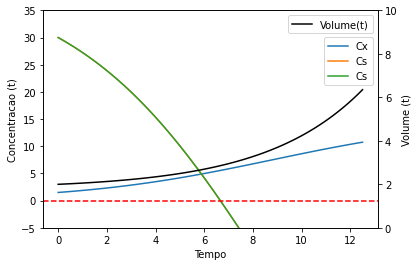

In [96]:
Result = odeint(C_Var, C, t, args=(μ, Kd, Yxs, α, β, Kdp, Q0, V0, Cxe, Cse, Cpe))
fig, ax1 = plt.subplots()

ax1.plot(t, Result[:, 0], label='Cx')
ax1.plot(t, Result[:, 1], label='Cs')
ax1.plot(t, Result[:, 1], label='Cs')
ax1.set_ylabel('Concentracao (t)')
ax1.set_ylim([-5, 35])
plt.legend(loc='upper right', bbox_to_anchor=(1, 0.9))
plt.axhline(0, color = 'r', linestyle = '--')

ax2 = ax1.twinx()
ax2.plot(t,Volume,label='Volume(t)',  color = 'k')
ax2.set_ylabel('Volume (t)')
ax2.set_ylim([0, 10])
ax1.set_xlabel('Tempo')
plt.legend()

plt.show()

##Simulação da variação da concentração para μ variável

Como observado para μ constante, limitações físicas relacionadas a disponibilidade limitada de nutrientes não são respeitadas pelo modelo, nas quais concentrações negativas de substrato são consideradas.

> Para ter em conta tais limitações físicas, diversos modelos foram propostos pela literatura na qual substituem a taxa de crescimento constante ($\mu$) por uma função dependente da taxa máxima de crescimento microbiano ($\mu_{max}$).




### Modelos cinéticos não estruturados para simulação **sem inibição**

#### (Monod, 1949) 

Descrito em: *Monod, Jacques (1949). "The growth of bacterial cultures". Annual Review of Microbiology. 3: 371–394. DOI: [10.1146/annurev.mi.03.100149.002103](https://https://www.annualreviews.org/doi/10.1146/annurev.mi.03.100149.002103)* o modelo de Monod é dado pela Eq. (14):

⠀

$\mu = \frac{\mu_{max}C_{s} }{K_{s}+C_{s}}$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (14)

⠀

A variação da concetração celular e de substrato passam a ser descritas pelas equações a seguir:

$\frac{\mathrm{dC_{x}} }{\mathrm{d} t} = DC_{xe} + (\frac{\mu_{max}C_{s} }{K_{s}+C_{s}} - k_{d} -D)  C_{x}$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (15)


$\frac{\mathrm{dC_{s}} }{\mathrm{d} t} = D(C_{se}-C_{s}) - (\frac{C_{x}}{Y_{\frac{x}{s}}}\frac{\mu_{max}C_{s} }{K_{s}+C_{s}})$ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Eq. (16)

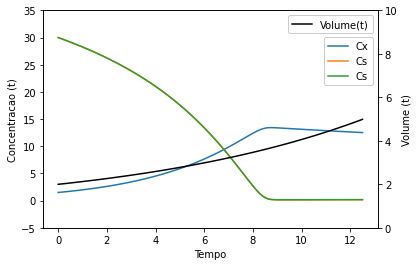

In [117]:
# Simulação - (Monod, 1949)

# -*- coding: utf-8 -*-
"""
Created on Wed Sep  7 15:36:42 2022

@author: Vítor Teixeira Mazziero - UNESP Araraquara
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Condições iniciais
Cx0 = 1.5 # Concentração inicial de células (inóculo) - C[0]
Cs0 = 30 # Concentração inicial de substrato - C[1]
Cp0 = 0 # Concentração inicial de produto - - C[2]

C = [Cx0, Cs0, Cp0]

# Parâmetros para crescimento celular
μmax = 0.35
Ks = 0.75 # Constante de meia saturação
Kd = 0

# Parâmetros para consumo de substrato
Yxs = 0.5 

# Parâmetros para formação de produto
α = 0.5
β = 0
Kdp = 0.1

# Parâmetros operacionais
Q0 = 0.12
V0 = 2.0
β = 0.1

#Concentrações de alimentação 
Cxe = 0
Cse = 20
Cpe = 0

# Vetor tempo
t=np.arange(0,12.6, 0.1) # Variação do tempo

def C_Var(C, t, μ, Kd, Yxs, α, β, Kdp, Q0, V0, Cxe, Cse, Cpe):
    # Vazão exponencial
    Q = Q0*(np.exp(β*t))
    V = V0 + (Q0/β)*(np.exp(β*t)-1)
    D = Q/V

    μ = μmax*(C[1]/(Ks+C[1])) #Eq. (14)
    dCxdt = D*Cxe + (μ-Kd-D)*C[0] #Eq. (5)
    dCsdt = D*(Cse - C[1]) - μ*C[0]/Yxs #Eq. (10)
    dCpdt = D*(Cpe - C[2]) + α*μ*C[0]+β*C[0]-Kdp*C[2] #Eq. (16)
    return (dCxdt, dCsdt, dCpdt)

Result = odeint(C_Var, C, t, args=(μmax, Kd, Yxs, α, β, Kdp, Q0, V0, Cxe, Cse, Cpe))
fig, ax1 = plt.subplots()

Q = Q0*(np.exp(β*t))
Volume = V0 + (Q0/β)*(np.exp(β*t)-1)

ax1.plot(t, Result[:, 0], label='Cx')
ax1.plot(t, Result[:, 1], label='Cs')
ax1.plot(t, Result[:, 1], label='Cs')
ax1.set_ylabel('Concentracao (t)')
ax1.set_ylim([-5, 35])
plt.legend(loc='upper right', bbox_to_anchor=(1, 0.9), facecolor='white', framealpha=1)

ax2 = ax1.twinx()
ax2.plot(t,Volume,label='Volume(t)',  color = 'k')
ax2.set_ylabel('Volume (t)')
ax2.set_ylim([0, 10])
ax1.set_xlabel('Tempo')
plt.legend(facecolor='white', framealpha=1)

plt.show()